Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


665/665 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9195 - loss: 0.1850 - val_accuracy: 0.9627 - val_loss: 0.0837
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9695 - loss: 0.0661 - val_accuracy: 0.9803 - val_loss: 0.0459
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9776 - loss: 0.0496 - val_accuracy: 0.9817 - val_loss: 0.0391
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9809 - loss: 0.0429 - val_accuracy: 0.9859 - val_loss: 0.0338
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9843 - loss: 0.0369 - val_accuracy: 0.9895 - val_loss: 0.0244
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9860 - loss: 0.0303 - val_accuracy: 0.9900 - val_loss: 0.0222
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9881 - loss: 0.0266 - val_accuracy: 0.9939 - val_loss: 0.0166
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9888 - loss: 0.0264 - val_accuracy: 0.9951 - va

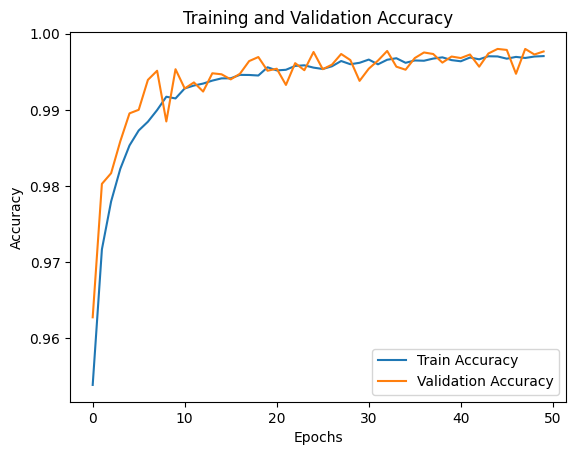

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 11, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,469 (556.52 KB)

 Trainable params: 47,489 (185.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 94,980 (371.02 KB)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv('loan_eligibility_dataset new.csv')

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting features and target
X = df.iloc[:, :-1].values  # Assuming last column is target
y = df.iloc[:, -1].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN input
X = np.expand_dims(X, axis=2)

# Split into training and testing
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=1)

train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

model.summary()


2657/2657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

📊 Evaluation on Training Data of CNN with Adam:
Accuracy  : 0.9978
Precision : 0.9971
Recall    : 0.9995
F1 Score  : 0.9983
ROC-AUC   : 1.0000
Confusion Matrix:
[[29810   159]
 [   29 55002]]
TN: 29810, FP: 159, FN: 29, TP: 55002


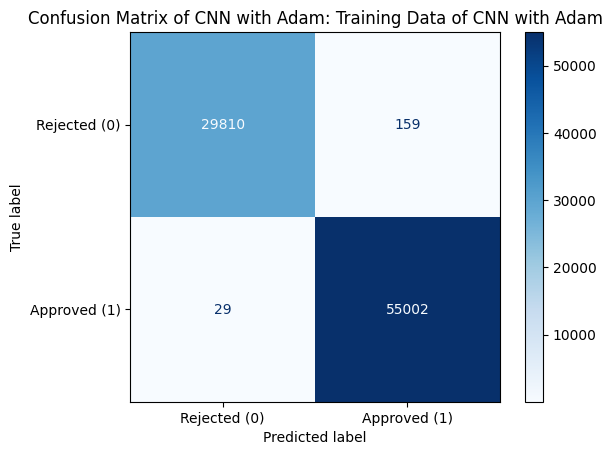

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of CNN with Adam:
Accuracy  : 0.9977
Precision : 0.9972
Recall    : 0.9992
F1 Score  : 0.9982
ROC-AUC   : 1.0000
Confusion Matrix:
[[5311   27]
 [   8 9654]]
TN: 5311, FP: 27, FN: 8, TP: 9654


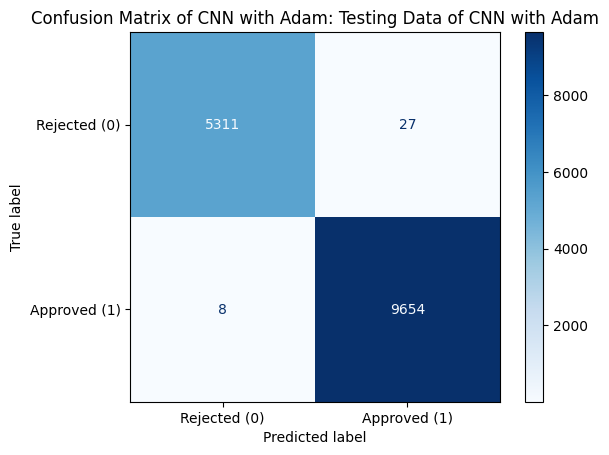

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of CNN with Adam: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of CNN with Adam")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of CNN with Adam")


<ipython-input-3-eeb6aefb9d1a>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-3-eeb6aefb9d1a>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8474 - loss: 0.2918 - val_accuracy: 0.9728 - val_loss: 0.0672
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9678 - loss: 0.0741 - val_accuracy: 0.9737 - val_loss: 0.0529
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9738 - loss: 0.0595 - val_accuracy: 0.9851 - val_loss: 0.0409
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9765 - loss: 0.0540 - val_accuracy: 0.9740 - val_loss: 0.0587
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9787 - loss: 0.0482 - val_accuracy: 0.9819 - val_loss: 0.0434
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9802 - loss: 0.0460 - val_accuracy: 0.9796 - val_loss: 0.0398
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9819 - loss: 0.0440 - val_accuracy: 0.9888 - val_loss: 0.0279
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9847 - loss: 0.0378 - val_accuracy: 0.

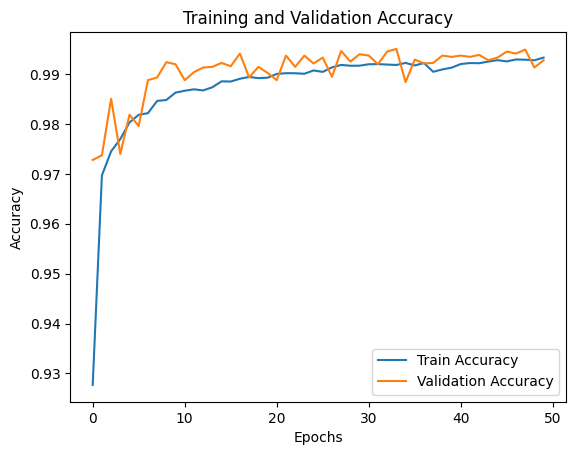

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout
from tensorflow.keras.optimizers import SGD

# Load dataset
data_path = "loan_eligibility_dataset new.csv"
df = pd.read_csv(data_path)

# Handle missing values (fill with median for numerical, mode for categorical)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=2)  # Reshape for CNN input

# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model with SGD + Momentum
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))

# Evaluate model
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

2657/2657 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

📊 Evaluation on Training Data of CNN with SGD:
Accuracy  : 0.9955
Precision : 0.9970
Recall    : 0.9960
F1 Score  : 0.9965
ROC-AUC   : 0.9999
Confusion Matrix:
[[29805   164]
 [  218 54813]]
TN: 29805, FP: 164, FN: 218, TP: 54813


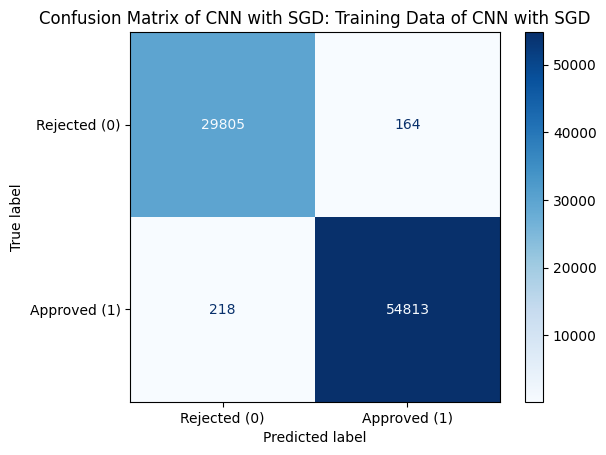

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📊 Evaluation on Testing Data of CNN with SGD:
Accuracy  : 0.9939
Precision : 0.9958
Recall    : 0.9946
F1 Score  : 0.9952
ROC-AUC   : 0.9999
Confusion Matrix:
[[2664   20]
 [  26 4790]]
TN: 2664, FP: 20, FN: 26, TP: 4790


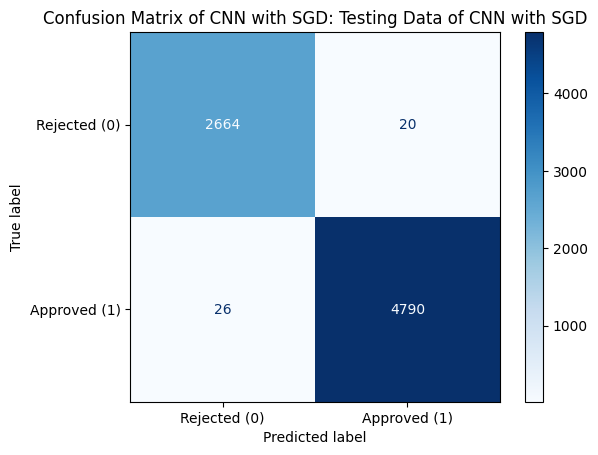

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of CNN with SGD: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of CNN with SGD")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of CNN with SGD")


<ipython-input-5-aabe1ab2eb2b>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-5-aabe1ab2eb2b>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9269 - loss: 0.1753 - val_accuracy: 0.9793 - val_loss: 0.0472
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9746 - loss: 0.0559 - val_accuracy: 0.9829 - val_loss: 0.0379
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9799 - loss: 0.0455 - val_accuracy: 0.9829 - val_loss: 0.0361
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9827 - loss: 0.0411 - val_accuracy: 0.9908 - val_loss: 0.0249
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9848 - loss: 0.0353 - val_accuracy: 0.9855 - val_loss: 0.0297
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9855 - loss: 0.0328 - val_accuracy: 0.9868 - val_loss: 0.0264
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9883 - loss: 0.0279 - val_accuracy: 0.9913 - val_loss: 0.0209
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9885 - loss: 0.0275 - val_accuracy: 0.

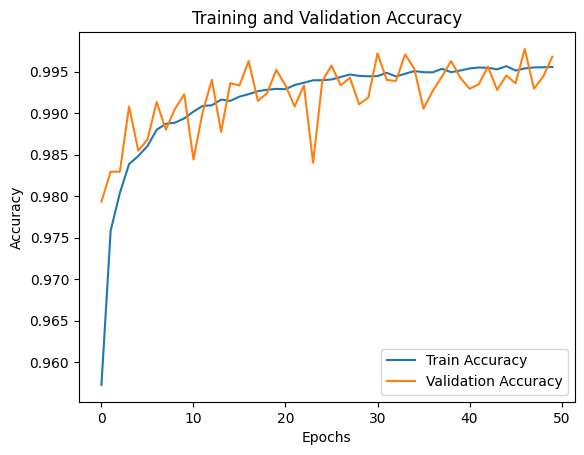

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout
from tensorflow.keras.optimizers import RMSprop

# Load dataset
data_path = "loan_eligibility_dataset new.csv"
df = pd.read_csv(data_path)

# Handle missing values (fill with median for numerical, mode for categorical)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=2)  # Reshape for CNN input

# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model with RMSprop
rmsprop = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))

# Evaluate model
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

2657/2657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

📊 Evaluation on Training Data of CNN with RMSprop:
Accuracy  : 0.9975
Precision : 0.9975
Recall    : 0.9987
F1 Score  : 0.9981
ROC-AUC   : 1.0000
Confusion Matrix:
[[29830   139]
 [   71 54960]]
TN: 29830, FP: 139, FN: 71, TP: 54960


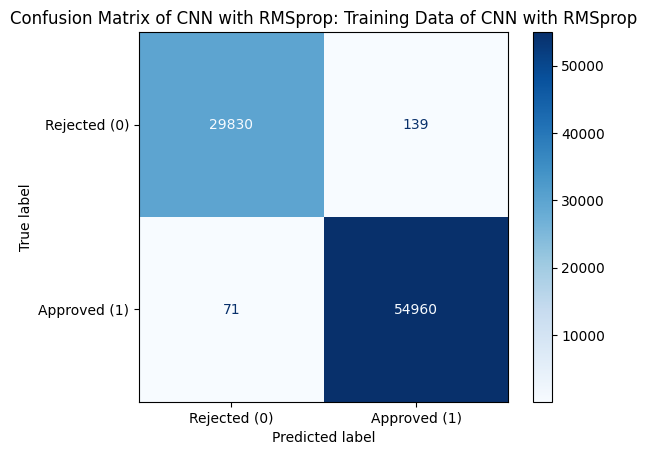

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📊 Evaluation on Testing Data of CNN with RMSprop:
Accuracy  : 0.9963
Precision : 0.9965
Recall    : 0.9977
F1 Score  : 0.9971
ROC-AUC   : 0.9999
Confusion Matrix:
[[2667   17]
 [  11 4805]]
TN: 2667, FP: 17, FN: 11, TP: 4805


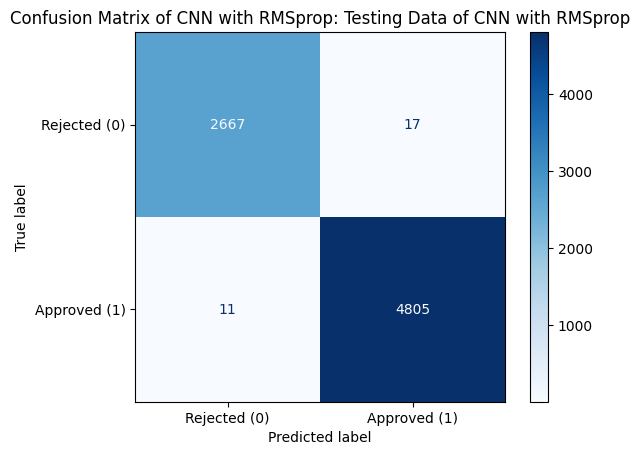

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of CNN with RMSprop: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of CNN with RMSprop")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of CNN with RMSprop")


<ipython-input-8-00da76c56b93>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-8-00da76c56b93>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7574 - loss: 0.4471 - val_accuracy: 0.9639 - val_loss: 0.1109
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9593 - loss: 0.1222 - val_accuracy: 0.9715 - val_loss: 0.0823
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9650 - loss: 0.0947 - val_accuracy: 0.9743 - val_loss: 0.0699
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9676 - loss: 0.0811 - val_accuracy: 0.9759 - val_loss: 0.0623
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9705 - loss: 0.0708 - val_accuracy: 0.9763 - val_loss: 0.0563
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9727 - loss: 0.0632 - val_accuracy: 0.9763 - val_loss: 0.0526
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9725 - loss: 0.0613 - val_accuracy: 0.9779 - val_loss: 0.0489
Epoch 8/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9750 - loss: 0.0547 - val_accuracy: 0.9807 - val_

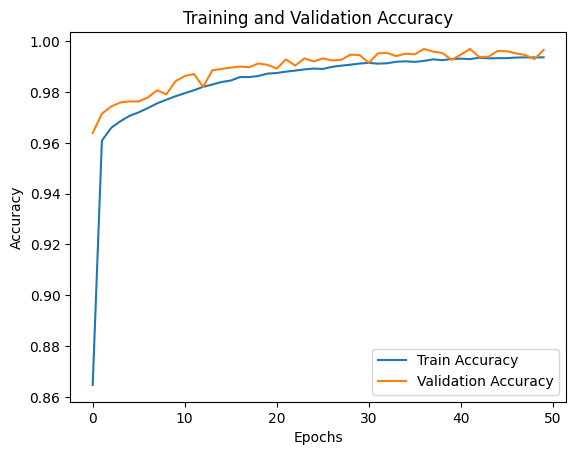

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout
from tensorflow.keras.optimizers import Adagrad

# Load dataset
data_path = "loan_eligibility_dataset new.csv"
df = pd.read_csv(data_path)

# Handle missing values (fill with median for numerical, mode for categorical)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=2)  # Reshape for CNN input

# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model with Adagrad
adagrad = Adagrad(learning_rate=0.01)
model.compile(optimizer=adagrad, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val))

# Evaluate model
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


2657/2657 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

📊 Evaluation on Training Data of CNN with Adagrad:
Accuracy  : 0.9976
Precision : 0.9985
Recall    : 0.9978
F1 Score  : 0.9981
ROC-AUC   : 1.0000
Confusion Matrix:
[[29887    82]
 [  122 54909]]
TN: 29887, FP: 82, FN: 122, TP: 54909


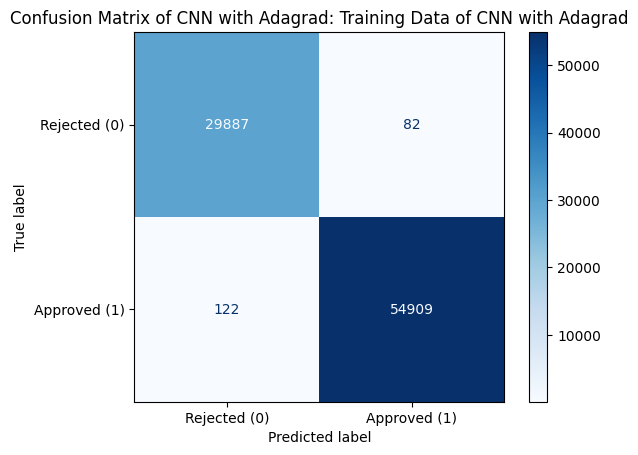

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 Evaluation on Testing Data of CNN with Adagrad:
Accuracy  : 0.9961
Precision : 0.9971
Recall    : 0.9969
F1 Score  : 0.9970
ROC-AUC   : 1.0000
Confusion Matrix:
[[2670   14]
 [  15 4801]]
TN: 2670, FP: 14, FN: 15, TP: 4801


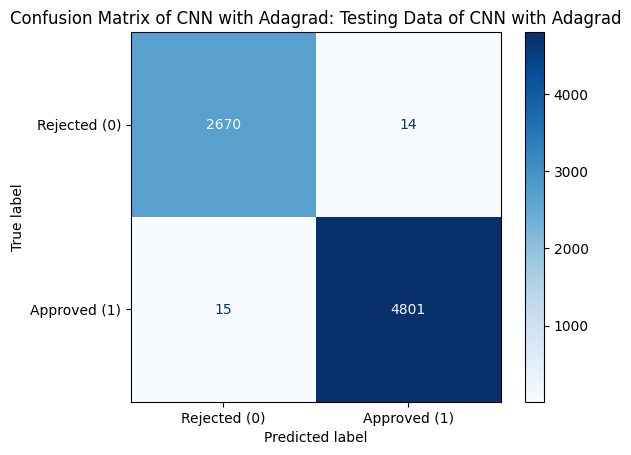

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of CNN with Adagrad: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(model, X_train, y_train, dataset_name="Training Data of CNN with Adagrad")

# Evaluate on Testing Data
evaluate_model(model, X_test, y_test, dataset_name="Testing Data of CNN with Adagrad")
